In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num_pts = 10000
noise_frac = 0.07

X1 = np.random.uniform(1, 51, num_pts).reshape(-1,1)
X2 = np.random.uniform(1, 51, num_pts).reshape(-1,1)
X3 = np.random.uniform(2, 51, num_pts).reshape(-1,1)
X4 = np.random.uniform(1, 51, num_pts).reshape(-1,1)
X5 = np.random.uniform(1, 51, num_pts).reshape(-1,1)
X6 = 2 * X1 ** 0.25 # Forcing high correlation with X1
X7 = 2 * X3 ** 0.25 # Forcing high correlation with X3

X = np.hstack((X1, X2, X3, X4, X5, X6, X7))

Y = 1 * X1 + 2 * X2 + 3 * X3 + 4 * X4 + 5 * X5 # Pretend we do NOT know this!
Y = Y.reshape(-1,1)

# We add fake noise to our label
Ynoise = np.amax(Y) * noise_frac
Y += np.random.uniform(-Ynoise, Ynoise, num_pts).reshape(-1,1)

data = np.hstack((X1, X2, X3, X4, X5, X6, X7, Y))
fdf = pd.DataFrame(data, columns=['X1','X2','X3','X4','X5','X6','X7','Y'])

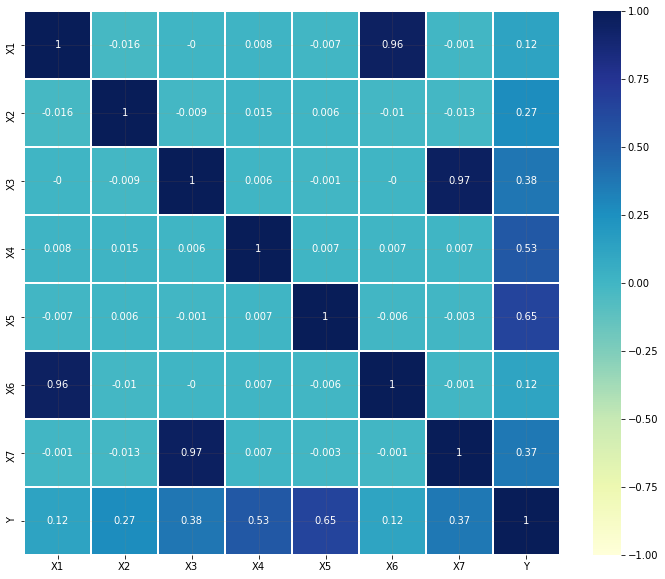

In [5]:
corr = fdf.corr() # create map
plt.figure(figsize = (12,10))
sns.heatmap(round(corr,3), annot = True, vmin=-1, vmax=1, cmap="YlGnBu", linewidths=.5)
plt.grid(b=True, color='#f68c1f', alpha=0.1)
plt.show()